<a href="https://colab.research.google.com/github/naveen-pixel07/2025_ML/blob/main/Linear_Ridge_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [5]:
data = load_diabetes(as_frame=True)
df = data.frame
X = df.drop('target', axis=1)
Y = df['target']
print("shape:", df.shape)
df.head()


shape: (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (353, 10) Test: (89, 10)


In [7]:
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [8]:
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

In [9]:
def print_equation(name, intercept, coefs, features):
    print(f"{name}")
    print(f"y = {intercept:.4f} + ", end="")
    terms = [f"({coef:.4f}*{f})" for coef,f in zip(coefs, features)]
    print(" + ".join(terms))

features = X.columns.tolist()
print_equation("Linear Regression Equation:", lr.intercept_, lr.coef_, features)
print()
print_equation("Ridge Regression Equation:", ridge.intercept_, ridge.coef_, features)
print()
print_equation("Lasso Regression Equation:", lasso.intercept_, lasso.coef_, features)


Linear Regression Equation:
y = 151.3456 + (37.9040*age) + (-241.9644*sex) + (542.4288*bmi) + (347.7038*bp) + (-931.4888*s1) + (518.0623*s2) + (163.4200*s3) + (275.3179*s4) + (736.1989*s5) + (48.6707*s6)

Ridge Regression Equation:
y = 152.2417 + (45.3674*age) + (-76.6661*sex) + (291.3388*bmi) + (198.9958*bp) + (-0.5303*s1) + (-28.5770*s2) + (-144.5119*s3) + (119.2601*s4) + (230.2216*s5) + (112.1498*s6)

Lasso Regression Equation:
y = 151.5749 + (0.0000*age) + (-152.6648*sex) + (552.6978*bmi) + (303.3652*bp) + (-81.3650*s1) + (-0.0000*s2) + (-229.2558*s3) + (0.0000*s4) + (447.9195*s5) + (29.6426*s6)


In [10]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

mse_table = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso"],
    "MSE": [mse_lr, mse_ridge, mse_lasso]
}).sort_values("MSE").reset_index(drop=True)

print(mse_table)


    Model          MSE
0   Lasso  2798.193485
1  Linear  2900.193628
2   Ridge  3077.415939


In [15]:
sample_indices = [0,1,2]
for idx in sample_indices:
    sample = X_test.iloc[idx]
    actual = y_test.iloc[idx]

    # manual predictions
    pred_lr = lr.intercept_ + np.dot(sample.values, lr.coef_)
    pred_ridge = ridge.intercept_ + np.dot(sample.values, ridge.coef_)
    pred_lasso = lasso.intercept_ + np.dot(sample.values, lasso.coef_)

    print(f"\nSample index: {idx}")
    print("Feature values:", sample.to_dict())
    print(f"Manual Linear y = {pred_lr:.4f}")
    print(f"Manual Ridge  y = {pred_ridge:.4f}")
    print(f"Manual Lasso  y = {pred_lasso:.4f}")
    print("Model predicted y:", y_pred_lr[idx], y_pred_ridge[idx], y_pred_lasso[idx])
    print("Actual y:", actual)



Sample index: 0
Feature values: {'age': 0.04534098333546186, 'sex': -0.044641636506989144, 'bmi': -0.006205954135807083, 'bp': -0.015998975220305175, 's1': 0.12501870313429186, 's2': 0.1251981011367534, 's3': 0.019186997017453092, 's4': 0.03430885887772673, 's5': 0.03243232415655107, 's6': -0.005219804415300423}
Manual Linear y = 139.5476
Manual Ridge  y = 157.2855
Manual Lasso  y = 149.9080
Model predicted y: 139.54755840379607 157.28546957818568 149.90797478815733
Actual y: 219.0

Sample index: 1
Feature values: {'age': 0.09256398319871433, 'sex': -0.044641636506989144, 'bmi': 0.0369065288194249, 'bp': 0.0218723855140367, 's1': -0.0249601584096303, 's2': -0.016658152053905938, 's3': 0.0007788079970183853, 's4': -0.03949338287409329, 's5': -0.022516528376302174, 's6': -0.021788232074638245}
Manual Linear y = 179.5172
Manual Ridge  y = 163.0078
Manual Lasso  y = 176.5444
Model predicted y: 179.51720835342775 163.00778719929292 176.5444187726484
Actual y: 70.0

Sample index: 2
Feature 

In [16]:
print("Final MSEs:")
print(mse_table.to_string(index=False))
best_model = mse_table.loc[0, "Model"]
print("\nBest model (lowest MSE):", best_model)


Final MSEs:
 Model         MSE
 Lasso 2798.193485
Linear 2900.193628
 Ridge 3077.415939

Best model (lowest MSE): Lasso


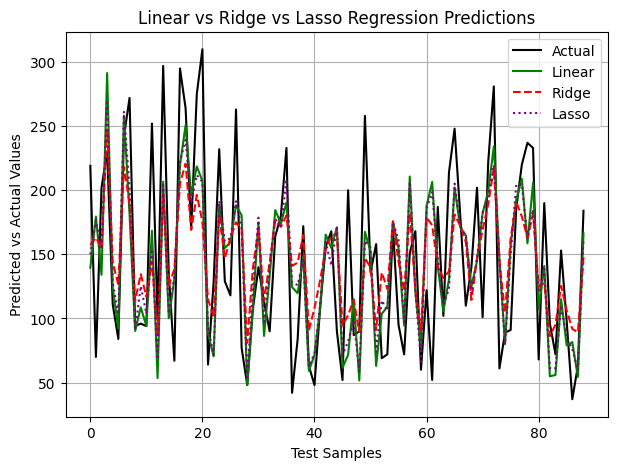

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

data = load_diabetes(as_frame=True)
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

plt.figure(figsize=(7, 5))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(y_pred_lr, label='Linear', color='green')
plt.plot(y_pred_ridge, label='Ridge', linestyle='--', color='red')
plt.plot(y_pred_lasso, label='Lasso', linestyle=':', color='purple')
plt.title("Linear vs Ridge vs Lasso Regression Predictions")
plt.xlabel("Test Samples")
plt.ylabel("Predicted vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()
